**Corpus Correlation Analysis of Scholarly STEM Articles from 2018 - 2022**

In [1]:
import pandas as pd
corpus = pd.read_csv("arxiv_corpus.csv")
corpus.head()

,years,text
0,2020,valence extraction using em selection and cooc...
1,2020,on the vocabulary of grammarbased codes and th...
2,2020,the latent relation mapping engine algorithm a...
3,2019,the modular audio recognition framework marf a...
4,2020,les entites spatiales dans la langue etude de...


In [2]:
corpus['strings'] = corpus['text'].apply(lambda x: "'" + str(x) + "'")
corpus = corpus.drop(['text'], axis=1)
corpus.head()

,years,strings
0,2020,'valence extraction using em selection and coo...
1,2020,'on the vocabulary of grammarbased codes and t...
2,2020,'the latent relation mapping engine algorithm ...
3,2019,'the modular audio recognition framework marf ...
4,2020,'les entites spatiales dans la langue etude d...


In [3]:
corpus.shape

(32216, 2)

In [4]:
corpus['years'].value_counts()

2022    9255
2021    7975
2020    6644
2019    4898
2018    3444
Name: years, dtype: int64

In [5]:
# converting 'strings' column in 'corpus' dataframe to a list
doc_corpus = ', '.join(corpus['strings'].astype(str))
type(doc_corpus)

str

In [6]:
corpus_list = doc_corpus.split(",")
type(corpus_list)

list

In [7]:
len(corpus_list)

32216

**Creating a TF-IDF DTM from corpus_list**

Frequency-Inverse Document Frequency (product of term frequency & inverse document frequency) is a statistical method commonly-used in NLP that evaluates how important a term/word is to a document in a collection of documents.

In [8]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.5)

# learns vocabulary & idf -> returns a DTM
X = vectorizer.fit_transform(corpus_list)
X.shape

(32216, 82630)

In [9]:
X

<32216x82630 sparse matrix of type '<class 'numpy.float64'>'
	with 2740643 stored elements in Compressed Sparse Row format>

In [10]:
type(X)

scipy.sparse._csr.csr_matrix

In [11]:
X_df = pd.DataFrame(X.todense()) # converting matrix to dataframe
X_df

,0,1,2,3,4,5,6,7,8,9,...,82620,82621,82622,82623,82624,82625,82626,82627,82628,82629
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_df.astype(bool).sum(axis=1) # getting number of non-zero entries in each row

0         85
1         77
2         83
3         75
4        104
        ... 
32211     75
32212    102
32213     49
32214     67
32215     76
Length: 32216, dtype: int64

In [13]:
X_df["years"] = corpus["years"]

In [14]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,82621,82622,82623,82624,82625,82626,82627,82628,82629,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020


**Pivot Table** is a powerful aggregate function like `groupby()` used to summarize large amounts of data. In this case, `pivot_table()` is used to summarize/group documents by years.

In [15]:
X_pivot = X_df.pivot_table(index='years')
X_pivot

,0,1,2,3,4,5,6,7,8,9,...,82620,82621,82622,82623,82624,82625,82626,82627,82628,82629
years,,,,,,,,,,,,,,,,,,,,,
2018,0.000000,0.000099,0.000000,0.000000,0.00000,0.000059,0.000000,0.000000,0.000000,0.000000,...,0.000054,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019,0.000029,0.000054,0.000000,0.000024,0.00000,0.000000,0.000049,0.000026,0.000000,0.000019,...,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.000000
2020,0.000021,0.000094,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000021,0.000000,...,0.000000,0.000000,0.000022,0.000028,0.000000,0.000011,0.000000,0.000000,0.000000,0.000145
2021,0.000020,0.000055,0.000025,0.000000,0.00000,0.000000,0.000000,0.000019,0.000000,0.000000,...,0.000020,0.000000,0.000000,0.000027,0.000018,0.000060,0.000000,0.000019,0.000000,0.000000
2022,0.000000,0.000027,0.000000,0.000000,0.00001,0.000037,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000


In [16]:
type(X_pivot)

pandas.core.frame.DataFrame

**Dimensionality Reduction on Sparse Matrix with Principal Component Analysis**

Principal Component Analysis is a commonly-used dimensionality reduction technique that reduces a dataset with large number of features by retaining the features/principal components that capture the most valuable information/variance.

In [17]:
# standardizing the data points
from sklearn.preprocessing import StandardScaler
standard_X_pivot = StandardScaler(with_mean=True, with_std=False).fit_transform(X_pivot)

# representing in CSR form
from scipy.sparse import csr_matrix
X_sparse = csr_matrix(standard_X_pivot)

# performing pca on sparse matrix
from sklearn.decomposition import TruncatedSVD
PCA = TruncatedSVD(n_components = 100)
PCA_X_sparse = PCA.fit(X_sparse).transform(X_sparse)

In [18]:
print("Original Number of Features:", X.shape[1])
print("Reduced Number of Features:", PCA_X_sparse.shape[1])
print("Explained Variance of Each Principal Component:", PCA.explained_variance_ratio_)

Original Number of Features: 82630
Reduced Number of Features: 5
Explained Variance of Each Principal Component: [7.66583499e-01 1.19179021e-01 7.07884178e-02 4.34490620e-02
 5.70629820e-35]


In [19]:
import numpy as np
m = np.asmatrix(PCA_X_sparse)
m

matrix([[ 3.49651755e-02,  1.11144522e-02, -3.12701062e-03,
          3.36465945e-04,  1.36068299e-17],
        [ 1.59759520e-02, -1.04811525e-02,  1.02589843e-02,
          1.15286153e-03,  1.30342456e-17],
        [-3.94757799e-03, -8.86210678e-03, -8.31743979e-03,
         -6.96182101e-03,  1.32459277e-17],
        [-1.80787531e-02, -1.68160623e-03, -4.90186293e-03,
          9.28116025e-03,  1.34706363e-17],
        [-2.89147963e-02,  9.91041334e-03,  6.08732900e-03,
         -3.80866672e-03,  1.34338201e-17]])

In [20]:
m_t = m.transpose()
m_t

matrix([[ 3.49651755e-02,  1.59759520e-02, -3.94757799e-03,
         -1.80787531e-02, -2.89147963e-02],
        [ 1.11144522e-02, -1.04811525e-02, -8.86210678e-03,
         -1.68160623e-03,  9.91041334e-03],
        [-3.12701062e-03,  1.02589843e-02, -8.31743979e-03,
         -4.90186293e-03,  6.08732900e-03],
        [ 3.36465945e-04,  1.15286153e-03, -6.96182101e-03,
          9.28116025e-03, -3.80866672e-03],
        [ 1.36068299e-17,  1.30342456e-17,  1.32459277e-17,
          1.34706363e-17,  1.34338201e-17]])

In [21]:
PCA_X_sparse_df = pd.DataFrame(m_t, columns =['2018', '2019', '2020', '2021', '2022'])
PCA_X_sparse_df

,2018,2019,2020,2021,2022
0,3.496518e-02,1.597595e-02,-3.947578e-03,-1.807875e-02,-2.891480e-02
1,1.111445e-02,-1.048115e-02,-8.862107e-03,-1.681606e-03,9.910413e-03
2,-3.127011e-03,1.025898e-02,-8.317440e-03,-4.901863e-03,6.087329e-03
3,3.364659e-04,1.152862e-03,-6.961821e-03,9.281160e-03,-3.808667e-03
4,1.360683e-17,1.303425e-17,1.324593e-17,1.347064e-17,1.343382e-17


**Yearly Corpus Correlation Heat Map**

<Axes: >

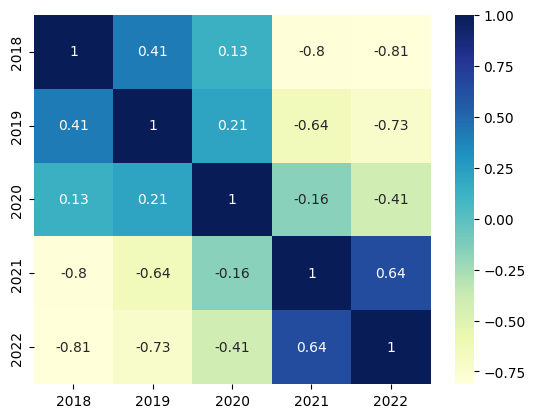

In [22]:
import seaborn as sns
sns.heatmap(PCA_X_sparse_df.corr(), cmap="YlGnBu", annot=True)